<a href="https://colab.research.google.com/github/DSKI23/alzheimervalentin/blob/50-code-bereinigen/DataExploration/data_exploration_lialko.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -r "https://raw.githubusercontent.com/DSKI23/alzheimervalentin/refs/heads/main/requirements.txt"

In [ ]:
from datasets import load_dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from huggingface_hub import notebook_login
notebook_login()

In [ ]:
alzheimer_df = load_dataset("DS23-KI-Projekt/alzheimerdataset")
df = alzheimer_df["train"].to_pandas()
df

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


alzheimers_prediction_dataset.csv:   0%|          | 0.00/10.1M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/74283 [00:00<?, ? examples/s]

,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,...,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis
0,Spain,90,Male,1,33.0,Medium,Never,Occasionally,No,No,...,Healthy,High,Retired,Single,No,Low,Medium,High,Urban,No
1,Argentina,72,Male,7,29.9,Medium,Former,Never,No,No,...,Healthy,Medium,Unemployed,Widowed,No,High,Low,High,Urban,No
2,South Africa,86,Female,19,22.9,High,Current,Occasionally,No,Yes,...,Average,Medium,Employed,Single,No,Low,Medium,High,Rural,No
3,China,53,Male,17,31.2,Low,Never,Regularly,Yes,No,...,Healthy,Medium,Retired,Single,No,High,Medium,Low,Rural,No
4,Sweden,58,Female,3,30.0,High,Former,Never,Yes,No,...,Unhealthy,High,Employed,Married,No,Low,Medium,High,Rural,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74278,Russia,60,Female,3,22.6,High,Former,Never,No,No,...,Average,High,Unemployed,Widowed,No,Medium,High,Medium,Rural,No
74279,UK,58,Male,18,30.6,Low,Never,Occasionally,Yes,No,...,Average,Medium,Unemployed,Single,No,Medium,High,High,Rural,No
74280,Spain,57,Female,13,28.2,Medium,Never,Regularly,No,No,...,Healthy,Low,Employed,Single,Yes,High,Low,Low,Rural,No
74281,Brazil,73,Female,7,29.0,Low,Never,Regularly,No,No,...,Healthy,Low,Employed,Widowed,No,Low,Low,High,Rural,No


<Axes: xlabel='Alzheimer’s Diagnosis', ylabel='count'>

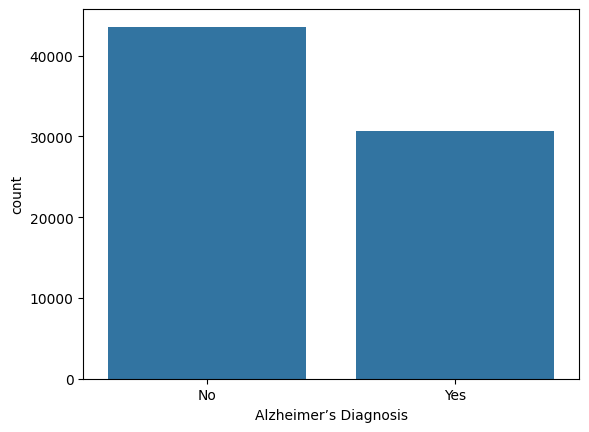

In [ ]:
alz_count = df['Alzheimer’s Diagnosis'].value_counts()
sns.barplot(alz_count)

<Axes: title={'center': "Percentage of people with Alzheimer's Disease by country"}, xlabel='Percentage', ylabel='Country'>

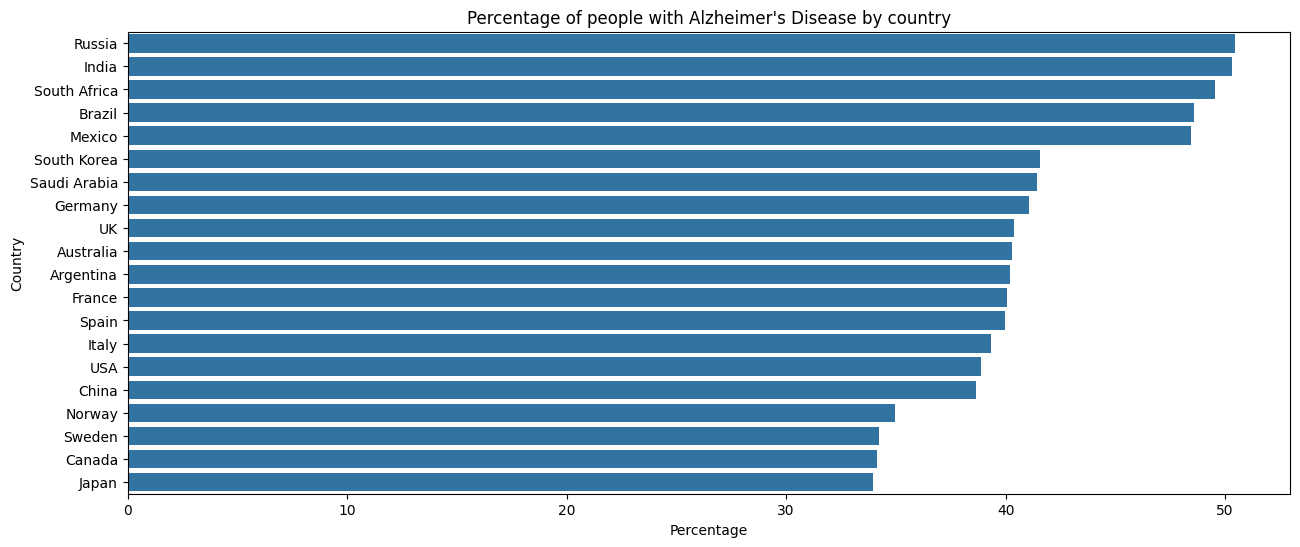

In [ ]:
# Count total diagnoses per country
all_counts = df.groupby('Country')['Alzheimer’s Diagnosis'].count().reset_index(name='Total Count')

# Count only "Yes" cases per country
yes_counts = df.groupby('Country')['Alzheimer’s Diagnosis'].apply(lambda x: (x == 'Yes').sum()).reset_index(name='Yes Count')

# Merge both counts
merged_df = pd.merge(all_counts, yes_counts, on='Country')

# Display result

merged_df["Percentage"] = (merged_df["Yes Count"]/merged_df['Total Count']*100).round(2)

merged_df = merged_df.sort_values("Percentage", ascending=False)


plt.figure(figsize=(15, 6))
plt.title("Percentage of people with Alzheimer's Disease by country")
sns.barplot(data=merged_df, x='Percentage', y='Country')

Text(0.5, 1.0, "Count of people with Alzheimer's Disease")

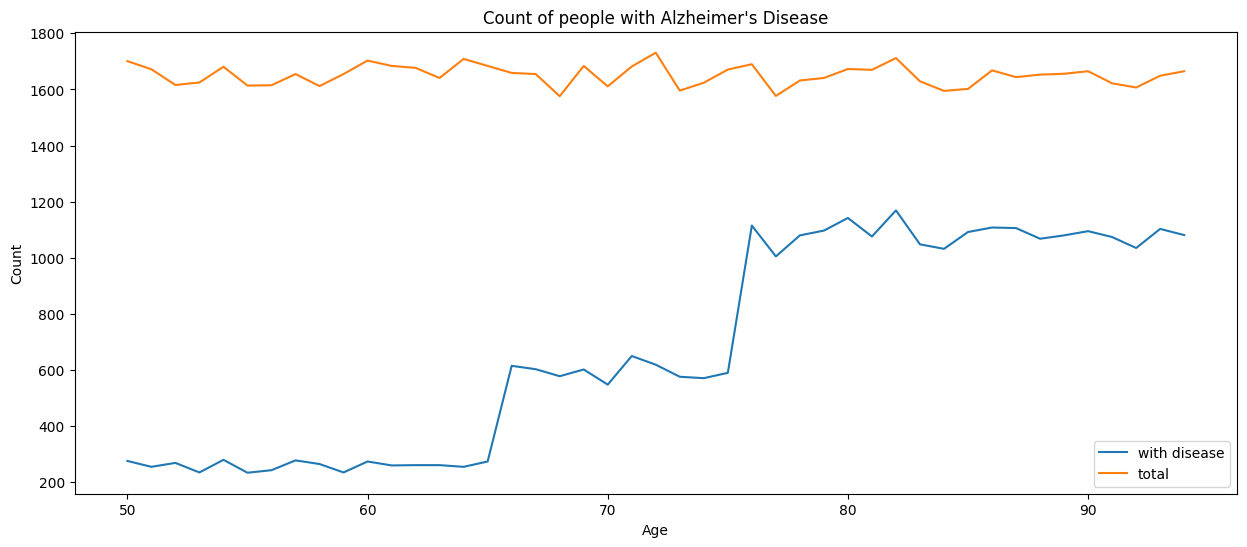

In [ ]:
alzheimer_counts = df.groupby('Age')['Alzheimer’s Diagnosis'].apply(lambda x: (x == 'Yes').sum()).reset_index(name='Count')

alzheimer_counts = alzheimer_counts.sort_values(by='Count', ascending=False)

total_counts = df.groupby('Age')['Alzheimer’s Diagnosis'].count().reset_index(name='Count')
plt.figure(figsize=(15, 6))
sns.lineplot(data=alzheimer_counts, x='Age', y='Count', label="with disease")
sns.lineplot(data=total_counts, x='Age', y='Count', label="total")
plt.title("Count of people with Alzheimer's Disease")

In [ ]:
df.columns

Index(['Country', 'Age', 'Gender', 'Education Level', 'BMI',
       'Physical Activity Level', 'Smoking Status', 'Alcohol Consumption',
       'Diabetes', 'Hypertension', 'Cholesterol Level',
       'Family History of Alzheimer’s', 'Cognitive Test Score',
       'Depression Level', 'Sleep Quality', 'Dietary Habits',
       'Air Pollution Exposure', 'Employment Status', 'Marital Status',
       'Genetic Risk Factor (APOE-ε4 allele)', 'Social Engagement Level',
       'Income Level', 'Stress Levels', 'Urban vs Rural Living',
       'Alzheimer’s Diagnosis'],
      dtype='object')

<Axes: title={'center': "Percentage of people with Alzheimer's Disease by Genetic Risk Factor (APOE-ε4 allele)"}, xlabel='Genetic Risk Factor (APOE-ε4 allele)', ylabel='Percentage'>

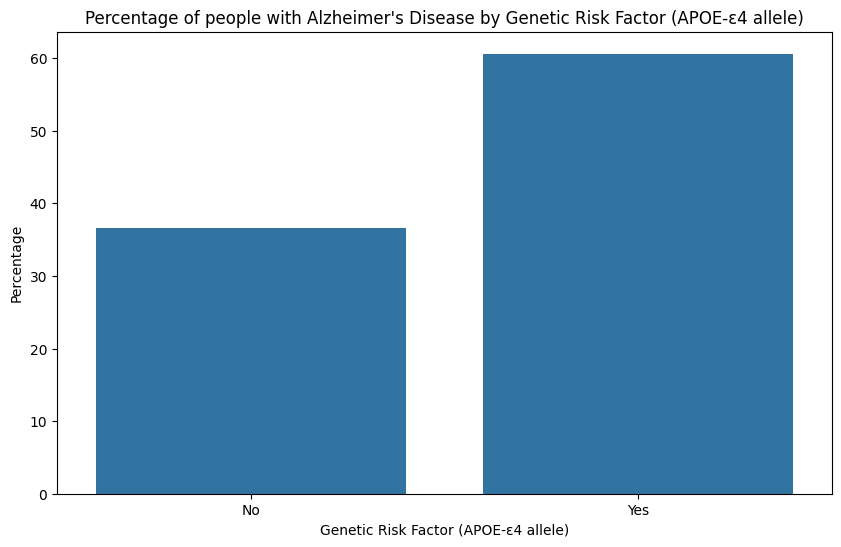

In [ ]:
alzheimer_counts = df.groupby('Genetic Risk Factor (APOE-ε4 allele)')['Alzheimer’s Diagnosis'].apply(lambda x: (x == 'Yes').sum()).reset_index(name='Yes Count')

alzheimer_counts = alzheimer_counts.sort_values(by='Yes Count', ascending=False)

total_counts = df.groupby('Genetic Risk Factor (APOE-ε4 allele)')['Alzheimer’s Diagnosis'].count().reset_index(name='Total Count')


m_df = pd.merge(total_counts, alzheimer_counts, on="Genetic Risk Factor (APOE-ε4 allele)")


m_df["Percentage"] = (m_df["Yes Count"]/m_df['Total Count']*100).round(2)

m_df_1 = m_df.sort_values("Percentage", ascending=False)



plt.figure(figsize=(10, 6))
plt.title("Percentage of people with Alzheimer's Disease by Genetic Risk Factor (APOE-ε4 allele)")
sns.barplot(data=m_df, x='Genetic Risk Factor (APOE-ε4 allele)', y="Percentage")

<Axes: title={'center': "Percentage of people with Alzheimer's Disease by 'Family History of Alzheimer’s'"}, xlabel='Family History of Alzheimer’s', ylabel='Percentage'>

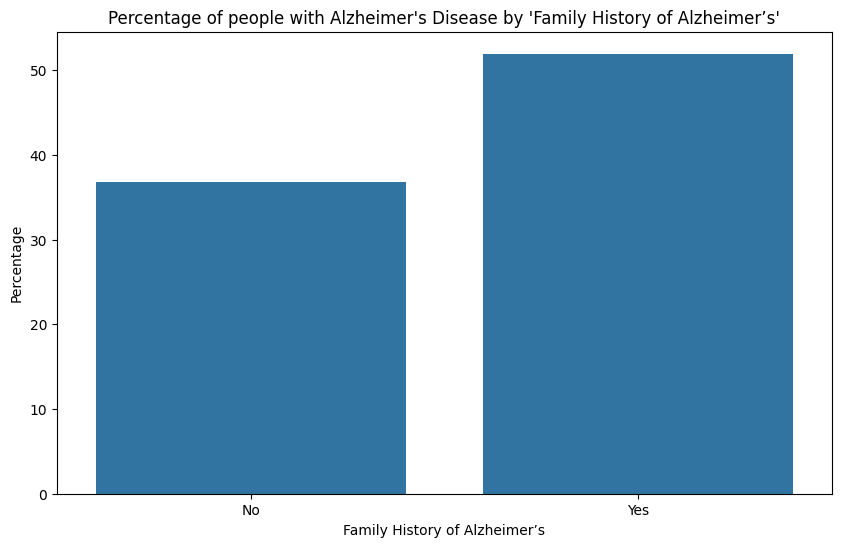

In [ ]:
alzheimer_counts = df.groupby('Family History of Alzheimer’s')['Alzheimer’s Diagnosis'].apply(lambda x: (x == 'Yes').sum()).reset_index(name='Yes Count')

alzheimer_counts = alzheimer_counts.sort_values(by='Yes Count', ascending=False)

total_counts = df.groupby('Family History of Alzheimer’s')['Alzheimer’s Diagnosis'].count().reset_index(name='Total Count')


m_df = pd.merge(total_counts, alzheimer_counts, on="Family History of Alzheimer’s")


m_df["Percentage"] = (m_df["Yes Count"]/m_df['Total Count']*100).round(2)

m_df_2 = m_df.sort_values("Percentage", ascending=False)

m_df

plt.figure(figsize=(10, 6))
plt.title("Percentage of people with Alzheimer's Disease by 'Family History of Alzheimer’s'")
sns.barplot(data=m_df, x='Family History of Alzheimer’s', y="Percentage")

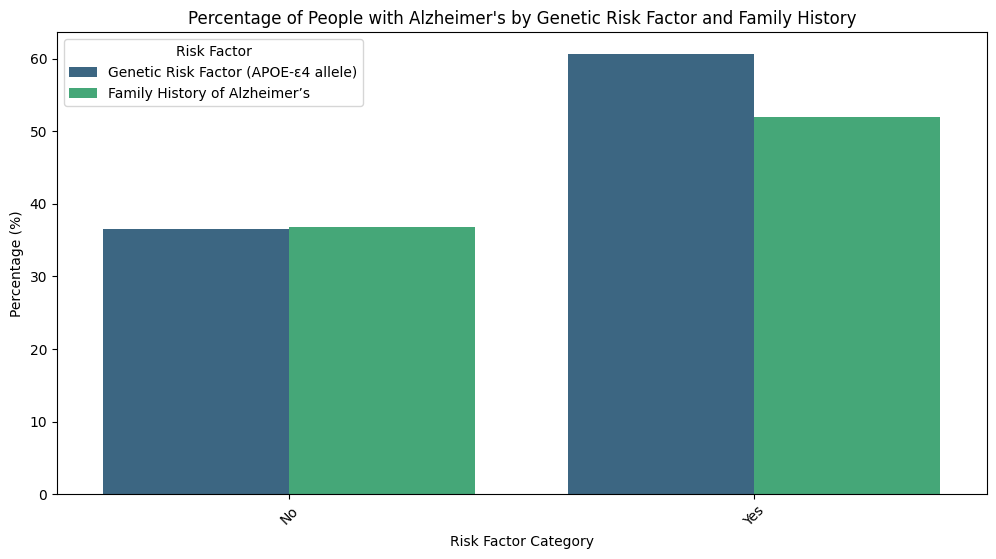

In [ ]:
# Calculate Alzheimer's diagnosis percentage by Genetic Risk Factor
genetic_counts = df.groupby('Genetic Risk Factor (APOE-ε4 allele)')['Alzheimer’s Diagnosis'].apply(lambda x: (x == 'Yes').sum()).reset_index(name='Yes Count')
genetic_counts = genetic_counts.sort_values(by='Yes Count', ascending=False)
total_genetic = df.groupby('Genetic Risk Factor (APOE-ε4 allele)')['Alzheimer’s Diagnosis'].count().reset_index(name='Total Count')
m_df_genetic = pd.merge(total_genetic, genetic_counts, on="Genetic Risk Factor (APOE-ε4 allele)")
m_df_genetic["Percentage"] = (m_df_genetic["Yes Count"] / m_df_genetic['Total Count'] * 100).round(2)
m_df_genetic["Factor"] = "Genetic Risk Factor (APOE-ε4 allele)"  # Add a label for hue

# Calculate Alzheimer's diagnosis percentage by Family History
family_counts = df.groupby('Family History of Alzheimer’s')['Alzheimer’s Diagnosis'].apply(lambda x: (x == 'Yes').sum()).reset_index(name='Yes Count')
family_counts = family_counts.sort_values(by='Yes Count', ascending=False)
total_family = df.groupby('Family History of Alzheimer’s')['Alzheimer’s Diagnosis'].count().reset_index(name='Total Count')
m_df_family = pd.merge(total_family, family_counts, on="Family History of Alzheimer’s")
m_df_family["Percentage"] = (m_df_family["Yes Count"] / m_df_family['Total Count'] * 100).round(2)
m_df_family.rename(columns={'Family History of Alzheimer’s': 'Genetic Risk Factor (APOE-ε4 allele)'}, inplace=True)
m_df_family["Factor"] = "Family History of Alzheimer’s"  # Add a label for hue

# Merge both datasets
merged_df = pd.concat([m_df_genetic, m_df_family])

# Plot the merged bar plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=merged_df,
    x='Genetic Risk Factor (APOE-ε4 allele)',
    y='Percentage',
    hue='Factor',  # Differentiates Genetic Risk Factor vs. Family History
    palette='viridis'
)

# Labels and title
plt.xlabel('Risk Factor Category')
plt.ylabel('Percentage (%)')
plt.title("Percentage of People with Alzheimer's by Genetic Risk Factor and Family History")
plt.xticks(rotation=45)  # Rotate for better readability
plt.legend(title="Risk Factor")

# Show plot
plt.show()

<ipython-input-37-cd2b3dca1c91>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hm["Physical Activity"] = pd.Categorical(df_hm["Physical Activity Level"], categories=physical_activity_order, ordered=True)
<ipython-input-37-cd2b3dca1c91>:9: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_df = df_hm.pivot_table(index="Physical Activity", columns="Alzheimer’s Diagnosis", values="BMI")


<Axes: xlabel='Alzheimer’s Diagnosis', ylabel='Physical Activity'>

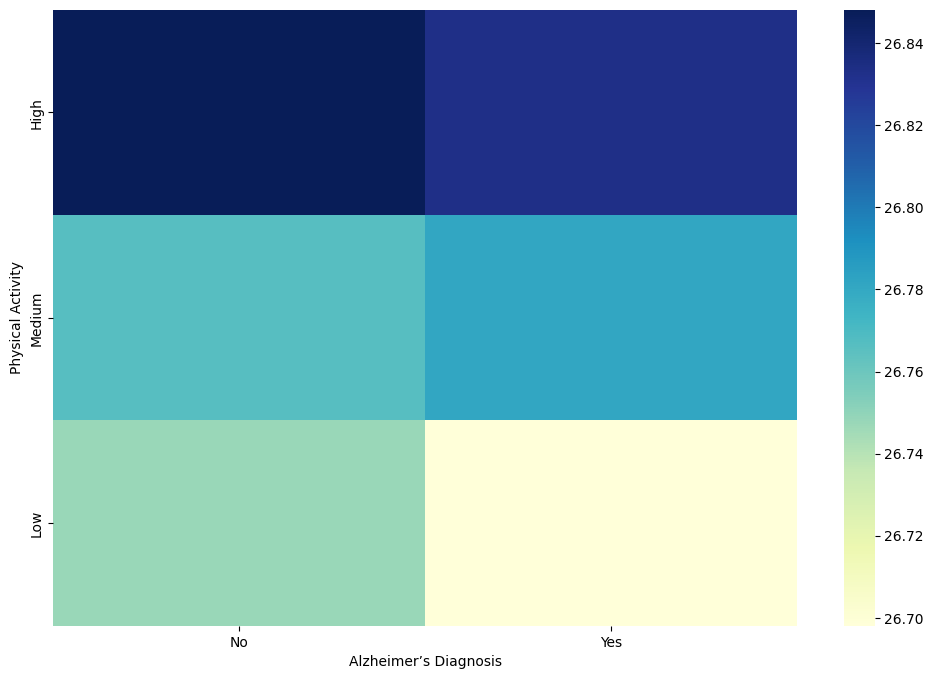

In [ ]:
df_hm= df[["Alzheimer’s Diagnosis", "Physical Activity Level", "BMI"]]

physical_activity_order = ["High", "Medium", "Low"]

# Convert 'Physical Activity' column to a categorical type with a custom order
df_hm["Physical Activity"] = pd.Categorical(df_hm["Physical Activity Level"], categories=physical_activity_order, ordered=True)

# Pivot the dataframe to get a matrix-like structure
pivot_df = df_hm.pivot_table(index="Physical Activity", columns="Alzheimer’s Diagnosis", values="BMI")
plt.figure(figsize=(12, 8))
# Create the heatmap
sns.heatmap(pivot_df, annot=False, cmap="YlGnBu")

<ipython-input-41-1c2a36e744bd>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x='Age', hue='Alzheimer’s Diagnosis', shade=True)


Text(0.5, 1.0, 'Distribution of Age, by Alzheimer’s Diagnosis')

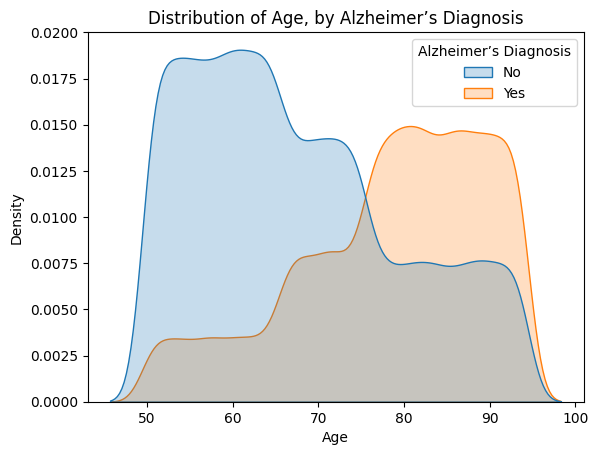

In [ ]:
sns.kdeplot(data=df, x='Age', hue='Alzheimer’s Diagnosis', shade=True)

# Add title
plt.title("Distribution of Age, by Alzheimer’s Diagnosis")